In [1]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F

In [2]:
def tri(x,c):
    y=x+c
    mask=x>=0
    y[:][mask]=0
    msk2=y<0
    y[:][msk2]=0
    return(y)

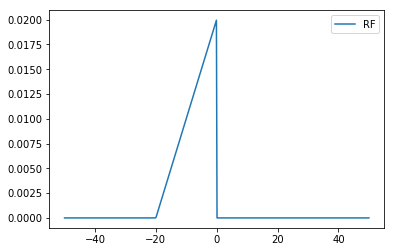

In [13]:
x = np.linspace(-50, 50, 500)
RF=tri(x,20)
RF=RF/sum(RF) 
plt.figure() #plot RF
plt.plot(x,RF, label='RF')
plt.legend()


In [14]:
def gauss(x, amplitude, position, sigma):
    return amplitude/np.sqrt(2*np.pi)/sigma * np.exp( -(x-position)**2/2./sigma**2)

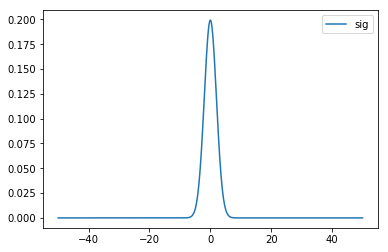

In [15]:

sig=gauss(x, 1., 0, 2)

plt.figure() #plot the original signal
plt.plot(x,sig, label='sig')
plt.legend()

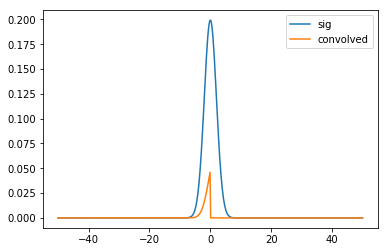

In [17]:
RF_m=np.zeros((len(RF),len(RF))) # initializing point spread function


for j in xrange(len(RF)):
    
    mask=np.argmax(RF)     
    position=RF[(mask-j):(len(RF))]
    len_p=len(position)
    RF_m[j,0:(len_p)] =RF[(mask-j):(len(RF))] # spatially varying point spread function

RF_m=RF_m.T



sigColumn=sig.reshape(len(sig),1) #reshape the signal to a column vector
sigMat=np.repeat(sigColumn,len(sig), axis=1) # make a matrix of the signal using the column vector

convolvePSF=np.sum(np.multiply(sigMat,RF_m),axis=0) # convolved signal for spatially varying point spread function




plt.figure() #plot the original signal
plt.plot(x,sig, label='sig')
plt.plot(x,convolvePSF,label='convolved')
plt.legend()
